In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sklm
import xgboost as xgb
import matplotlib

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submissions = pd.read_csv('submissionfile.csv')
vd = pd.read_csv('VariableDefinitions.csv')

In [3]:
vd.head()

Variable Definitions                                         Unnamed: 1
0              country                         Country interviewee is in.
1                 year                           Year survey was done in.
2             uniqueid             Unique identifier for each interviewee
3        location_type                     Type of location: Rural, Urban
4     cellphone_access  If interviewee has access to a cellphone: Yes, No

In [4]:
train.shape

(23524, 13)

In [33]:
train = pd.read_csv('train.csv')
train.head()

country  year    uniqueid bank_account location_type cellphone_access  \
0   Kenya  2018  uniqueid_1          Yes         Rural              Yes   
1   Kenya  2018  uniqueid_2           No         Rural               No   
2   Kenya  2018  uniqueid_3          Yes         Urban              Yes   
3   Kenya  2018  uniqueid_4           No         Rural              Yes   
4   Kenya  2018  uniqueid_5           No         Urban               No   

   household_size  age_of_respondent gender_of_respondent  \
0               3                 24               Female   
1               5                 70               Female   
2               5                 26                 Male   
3               5                 34               Female   
4               8                 26                 Male   

  relationship_with_head           marital_status  \
0                 Spouse  Married/Living together   
1      Head of Household                  Widowed   
2         Other relative     Single/Never Married   
3      Head of Household  Married/Living together   
4                  Child     Single/Never Married   

                   education_level                   job_type  
0              Secondary education              Self employed  
1              No formal education       Government Dependent  
2  Vocational/Specialised training              Self employed  
3                Primary education  Formally employed Private  
4                Primary education        Informally employed

In [6]:
train.isna().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [7]:
cols = train.columns
print(len(cols))
print(cols)

13
Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')


In [8]:
print(train.dtypes)

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object


In [9]:
#checking the amount of unique values in each feature

def value_count(data, cols):
    for col in cols:
        value = data[col].value_counts().count()
        print('\n' + 'For column' + '                                     ' + col)
        print(value)
        

value_count(train, cols)


For column                                     country
4

For column                                     year
3

For column                                     uniqueid
8735

For column                                     bank_account
2

For column                                     location_type
2

For column                                     cellphone_access
2

For column                                     household_size
20

For column                                     age_of_respondent
85

For column                                     gender_of_respondent
2

For column                                     relationship_with_head
6

For column                                     marital_status
5

For column                                     education_level
6

For column                                     job_type
10


In [10]:
new_columns = ['country', 'year', 'bank_account', 'location_type', 'cellphone_access', 'gender_of_respondent',
                   'relationship_with_head', 'marital_status', 'education_level', 'job_type']

In [11]:
#checking the amount of unique values in each feature

def value_counts(data, cols):
    for col in cols:
        value = data[col].value_counts(normalize=True) * 100
        print('\n' 'For'+ ' ' + col)
        print(value)
        

value_counts(train, new_columns)


For country
Rwanda      37.132290
Tanzania    28.141473
Kenya       25.794933
Uganda       8.931304
Name: country, dtype: float64

For year
2016    37.132290
2018    34.726237
2017    28.141473
Name: year, dtype: float64

For bank_account
No     85.920762
Yes    14.079238
Name: bank_account, dtype: float64

For location_type
Rural    60.971774
Urban    39.028226
Name: location_type, dtype: float64

For cellphone_access
Yes    74.196565
No     25.803435
Name: cellphone_access, dtype: float64

For gender_of_respondent
Female    58.990818
Male      41.009182
Name: gender_of_respondent, dtype: float64

For relationship_with_head
Head of Household      54.544295
Spouse                 27.716375
Child                   9.475429
Parent                  4.616562
Other relative          2.839653
Other non-relatives     0.807686
Name: relationship_with_head, dtype: float64

For marital_status
Married/Living together    45.693760
Single/Never Married       33.935555
Widowed                    11

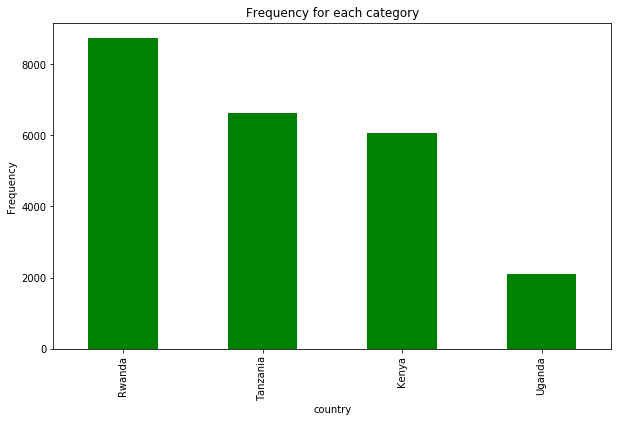

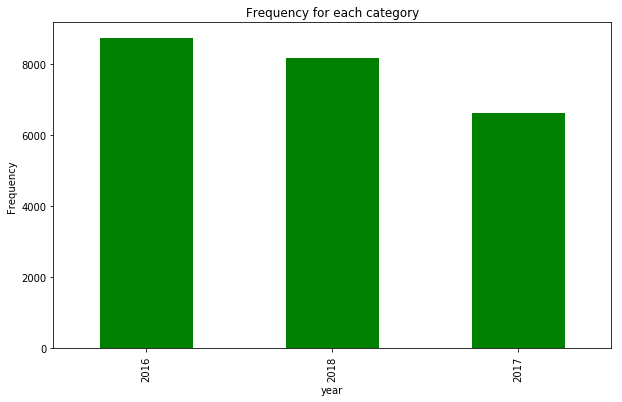

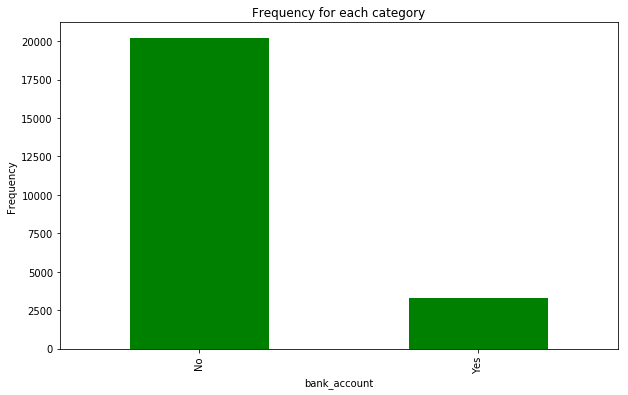

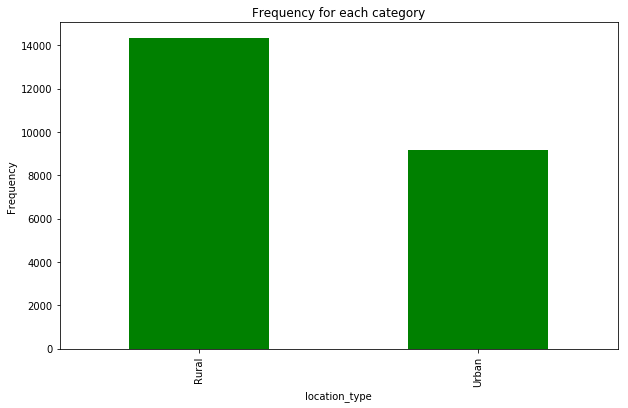

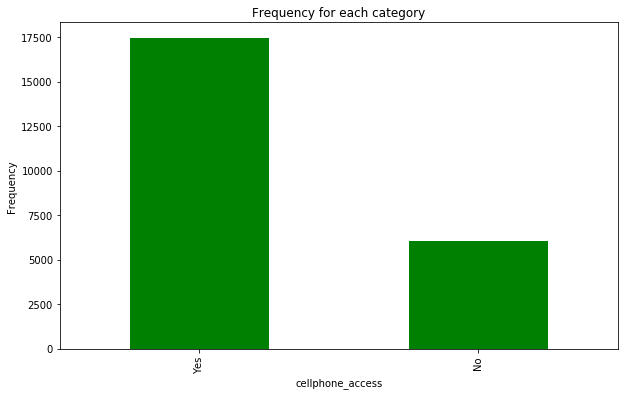

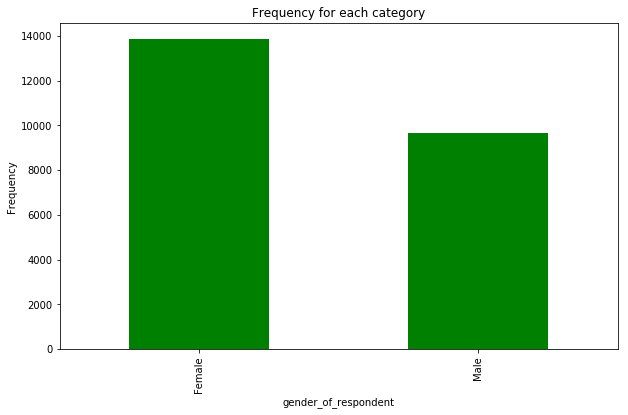

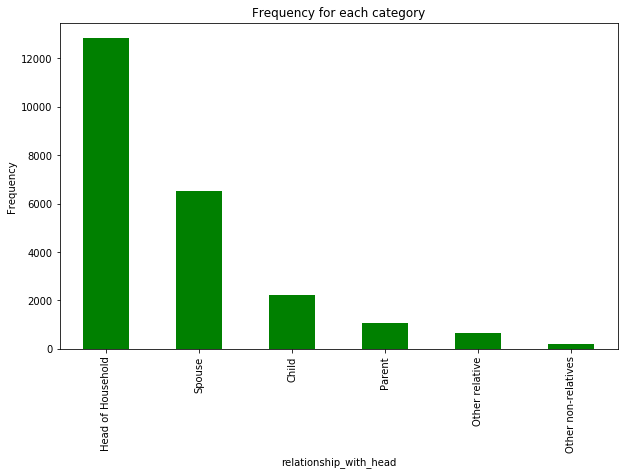

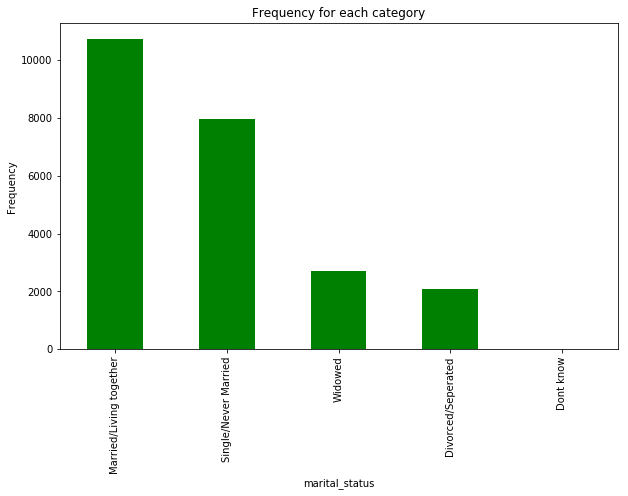

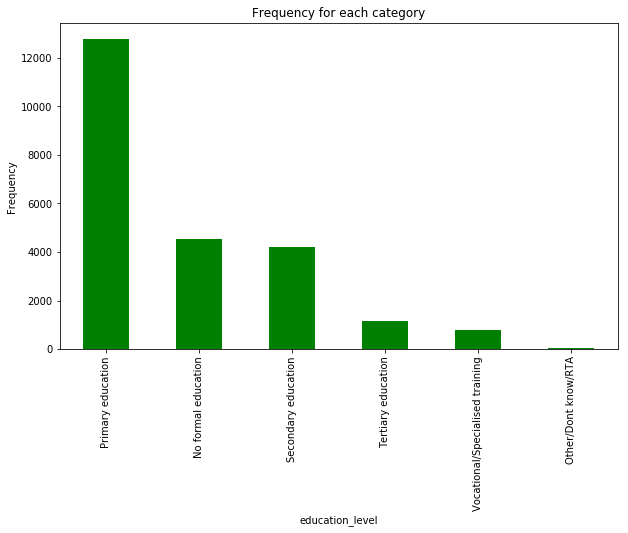

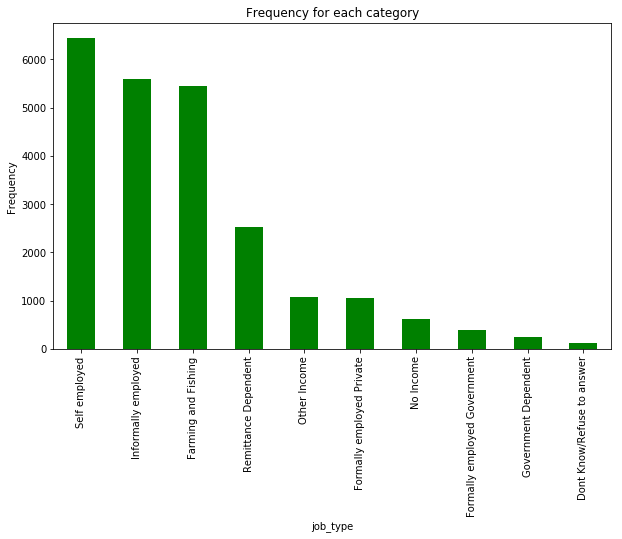

In [12]:
#checking frequency of each feature using bar chart
def plot_bar(data, cols):
    for col in cols:
        ax = data[col].value_counts().plot(kind='bar',
                                    figsize=(10,6),
                                    title="Frequency for each category", color= 'g')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
    
plot_bar(train, new_columns)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [14]:
train.head()

country  year    uniqueid bank_account location_type cellphone_access  \
0   Kenya  2018  uniqueid_1          Yes         Rural              Yes   
1   Kenya  2018  uniqueid_2           No         Rural               No   
2   Kenya  2018  uniqueid_3          Yes         Urban              Yes   
3   Kenya  2018  uniqueid_4           No         Rural              Yes   
4   Kenya  2018  uniqueid_5           No         Urban               No   

   household_size  age_of_respondent gender_of_respondent  \
0               3                 24               Female   
1               5                 70               Female   
2               5                 26                 Male   
3               5                 34               Female   
4               8                 26                 Male   

  relationship_with_head           marital_status  \
0                 Spouse  Married/Living together   
1      Head of Household                  Widowed   
2         Other relative     Single/Never Married   
3      Head of Household  Married/Living together   
4                  Child     Single/Never Married   

                   education_level                   job_type  
0              Secondary education              Self employed  
1              No formal education       Government Dependent  
2  Vocational/Specialised training              Self employed  
3                Primary education  Formally employed Private  
4                Primary education        Informally employed

AxesSubplot(0.125,0.125;0.775x0.755)


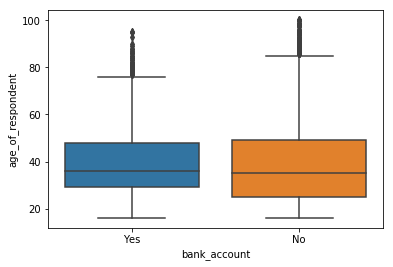

In [15]:
print(sns.boxplot(x='bank_account', y='age_of_respondent', data=train))

AxesSubplot(0.125,0.125;0.775x0.755)


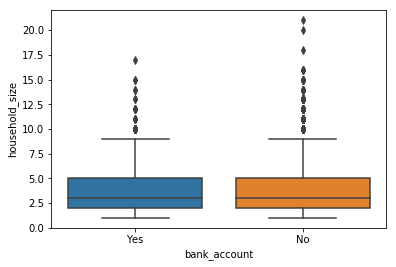

In [16]:
print(sns.boxplot(x='bank_account', y='household_size', data=train))

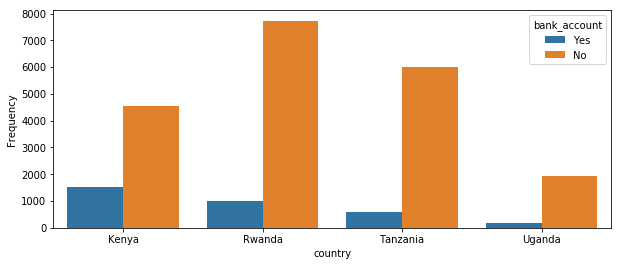

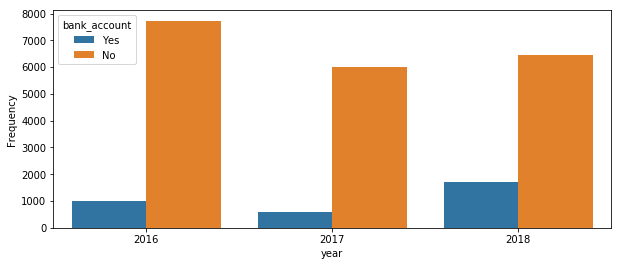

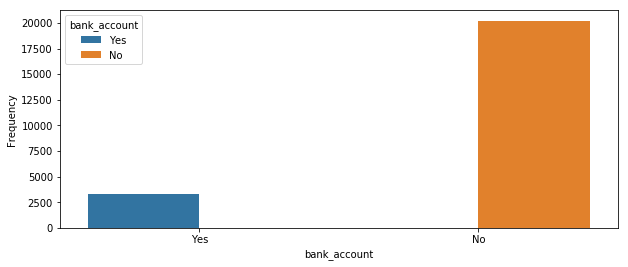

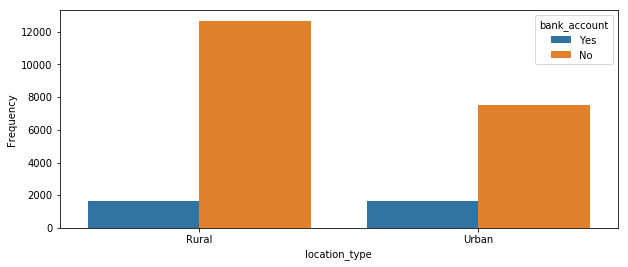

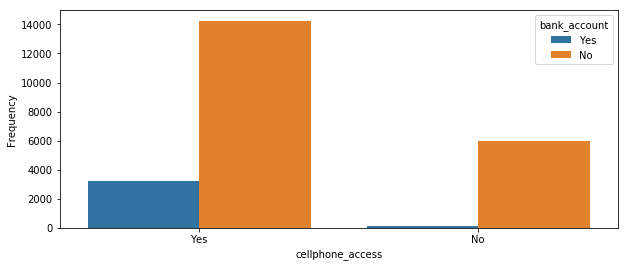

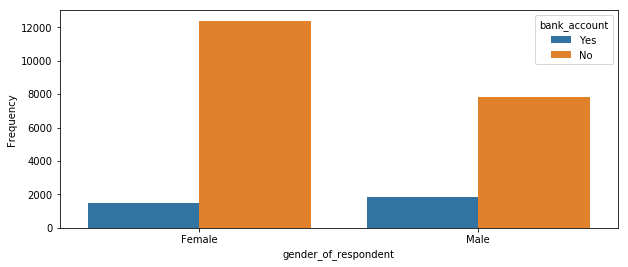

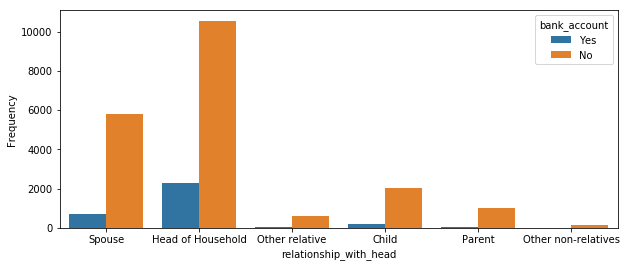

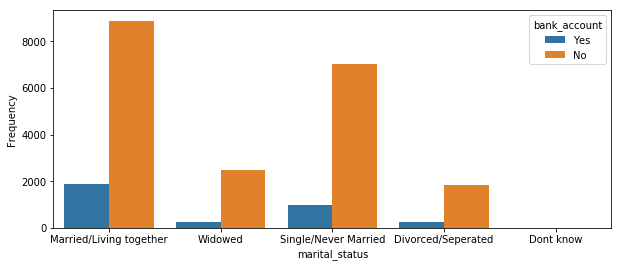

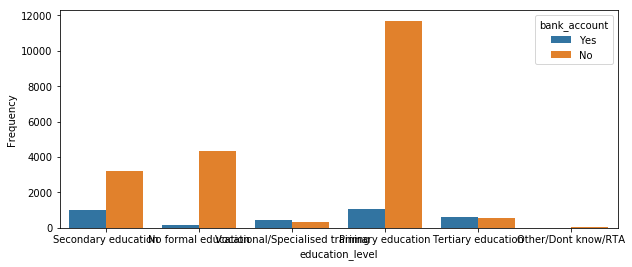

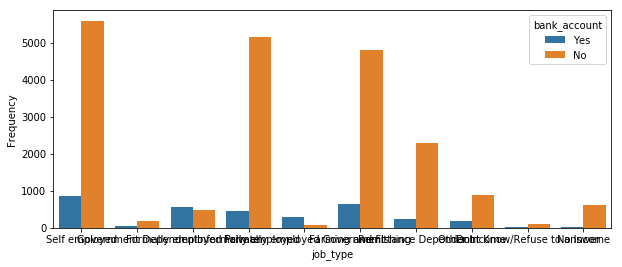

In [50]:
def label_check(data, cols):
    
    for i in cols:
        plt.figure(figsize=(10,4))
        sns.countplot(x=data[i], hue='bank_account', data=data)
        
        plt.xlabel(i)
        plt.ylabel('Frequency')
        plt.show()
    
        
label_check(train, new_columns)

#ax = sns.countplot(x='relationship_with_head', hue='bank_account', data=train)

In [18]:
print(train['bank_account'].value_counts())

No     20212
Yes     3312
Name: bank_account, dtype: int64


In [20]:
Labels = np.array(train['bank_account'])
Labels

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [21]:
train['bank_account'].value_counts(normalize=True) * 100

0    85.920762
1    14.079238
Name: bank_account, dtype: float64

In [19]:
labels = {'Yes': 1, 'No': 0}

train['bank_account'] = [labels[x] for x in train['bank_account']]
train['bank_account'].value_counts()

0    20212
1     3312
Name: bank_account, dtype: int64

In [22]:
train.describe()

year  bank_account  household_size  age_of_respondent
count  23524.000000  23524.000000    23524.000000       23524.000000
mean    2016.975939      0.140792        3.797483          38.805220
std        0.847371      0.347815        2.227613          16.520569
min     2016.000000      0.000000        1.000000          16.000000
25%     2016.000000      0.000000        2.000000          26.000000
50%     2017.000000      0.000000        3.000000          35.000000
75%     2018.000000      0.000000        5.000000          49.000000
max     2018.000000      1.000000       21.000000         100.000000

In [41]:
for col in new_columns:
    
    grouped = train.groupby([col, 'bank_account'])
    print(grouped.size())

country   bank_account
Kenya     No              4547
          Yes             1521
Rwanda    No              7732
          Yes             1003
Tanzania  No              6013
          Yes              607
Uganda    No              1920
          Yes              181
dtype: int64
year  bank_account
2016  No              7732
      Yes             1003
2017  No              6013
      Yes              607
2018  No              6467
      Yes             1702
dtype: int64
bank_account  bank_account
No            No              20212
Yes           Yes              3312
dtype: int64
location_type  bank_account
Rural          No              12672
               Yes              1671
Urban          No               7540
               Yes              1641
dtype: int64
cellphone_access  bank_account
No                No               5966
                  Yes               104
Yes               No              14246
                  Yes              3208
dtype: int64
gender_of_respond

In [36]:
grouped.size()

bank_account  gender_of_respondent
No            Female                  12395
              Male                     7817
Yes           Female                   1482
              Male                     1830
dtype: int64

In [48]:
banking = pd.crosstab(index=train['job_type'], columns=train['bank_account'])
banking

bank_account                    No  Yes
job_type                               
Dont Know/Refuse to answer     112   14
Farming and Fishing           4806  635
Formally employed Government    87  300
Formally employed Private      484  571
Government Dependent           197   50
Informally employed           5152  445
No Income                      614   13
Other Income                   884  196
Remittance Dependent          2287  240
Self employed                 5589  848